<a href="https://colab.research.google.com/github/nisrinaam29/Face-Recognition-Student-Attendance/blob/main/Copy_of_Bean_Disease_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this preject i build a classifier for bean disease. The dataset based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. The goal is to build a neural network than can tell the difference between the healthy and diseased leaves.


In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:01<00:00, 115MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:00<00:00, 41.7MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 50.5MB/s]


In [ ]:
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

PRE PROCESSING AND LOAD DATA TRAIN, TEST, VAL

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
      rescale=1./255
)
test_datagen = ImageDataGenerator(
      rescale=1./255
)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TEST_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (224,224)
CLASS_MODE ='categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

test_generator = test_datagen.flow_from_directory(
    TEST_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)



Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


BUILD MODEL


In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # There are 3 output neuron. It will contain 3 class, angular leaf spot, bean rust, healthy
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

COMPILING THE MODEL

In [ ]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(OPTIMIZER, LOSS_FUNCTION, metrics=['accuracy'])

MODEL TRAIN

In [ ]:
NUM_EPOCHS = 50 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)


Epoch 1/50
9/9 [==============================] - 37s 2s/step - loss: 1.3565 - accuracy: 0.3346 - val_loss: 1.0830 - val_accuracy: 0.3383
Epoch 2/50
9/9 [==============================] - 15s 2s/step - loss: 1.0995 - accuracy: 0.4439 - val_loss: 1.1236 - val_accuracy: 0.3684
Epoch 3/50
9/9 [==============================] - 16s 2s/step - loss: 1.0672 - accuracy: 0.4043 - val_loss: 1.0712 - val_accuracy: 0.3308
Epoch 4/50
9/9 [==============================] - 16s 2s/step - loss: 1.0474 - accuracy: 0.4333 - val_loss: 0.9504 - val_accuracy: 0.5188
Epoch 5/50
9/9 [==============================] - 18s 2s/step - loss: 0.9270 - accuracy: 0.5619 - val_loss: 0.8761 - val_accuracy: 0.5940
Epoch 6/50
9/9 [==============================] - 15s 2s/step - loss: 0.9200 - accuracy: 0.5551 - val_loss: 0.8216 - val_accuracy: 0.6316
Epoch 7/50
9/9 [==============================] - 15s 2s/step - loss: 0.8710 - accuracy: 0.5986 - val_loss: 0.8220 - val_accuracy: 0.5865
Epoch 8/50
9/9 [==================

MODEL PREDICTIONS

In [ ]:
import numpy as np
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis = 1)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy : {test_accuracy}")
print(f"Test Loss : {test_loss}")

2/2 [==============================] - 1s 12ms/step - loss: 0.3167 - accuracy: 0.9023
Test Accuracy : 0.902255654335022
Test Loss : 0.3167368471622467


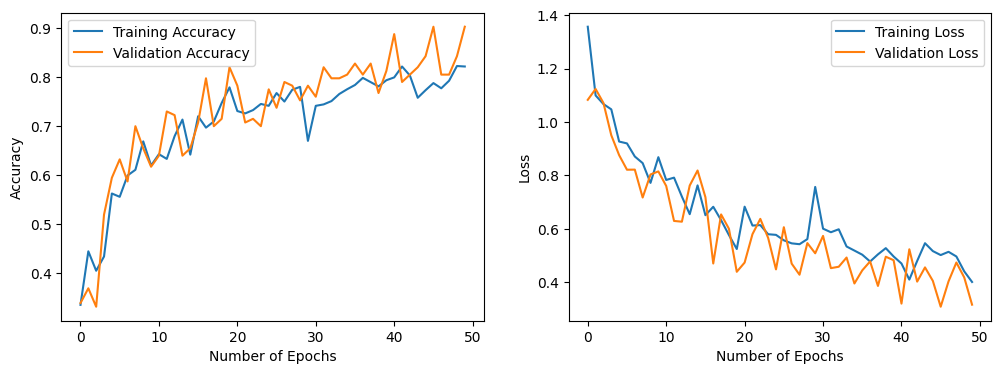

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()